# Dimensionality Reduction with Scikit-Learn and UMAP

In this notebook, we will explore dimensionality reduction techniques using Scikit-Learn and UMAP. We will use the wine dataset from Scikit-Learn and apply PCA, MDS, t-SNE, and UMAP to visualize the data in 2D and 3D. We will also explore the explained variance ratio and the change in explained variance ratio with the number of components.

## Load the Dataset + EDA

In [2]:
from sklearn import datasets

wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data
target = wine_data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# check for missing values
df.isnull().sum() # no missing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
# check for duplicates
df.duplicated().sum() # no duplicates

0

In [5]:
# summary statistics
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Preprocessing (Scaling)

In [6]:
# scale the data
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## PCA on the Scaled Data

In [7]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit_transform(df_scaled)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

### Eigenvectors

In [8]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

### Eigenvalues

In [9]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187])

### Singular Values

In [10]:
pca.singular_values_ # eigenvalues = singular values squared divided by n-1

array([28.94203422, 21.08225141, 16.04371561])

In [11]:
eigenvalues = pca.singular_values_**2/(len(df_scaled)-1)
eigenvalues

array([4.73243698, 2.51108093, 1.45424187])

### Loadings

In [12]:
import numpy as np

loadings = pca.components_.T * np.sqrt(eigenvalues)
loadings

array([[ 0.31397655, -0.76641313, -0.25008675],
       [-0.53338511, -0.35643434,  0.10734238],
       [-0.00446191, -0.50085499,  0.75517562],
       [-0.52062156,  0.01678212,  0.73811964],
       [ 0.30889183, -0.47481174,  0.15768234],
       [ 0.85855172, -0.10306415,  0.17628006],
       [ 0.92005825,  0.00532409,  0.18171024],
       [-0.64943384, -0.0456051 ,  0.20545029],
       [ 0.68183968, -0.06227904,  0.18022987],
       [-0.19277824, -0.83985184, -0.16558024],
       [ 0.64547776,  0.44248692,  0.10277078],
       [ 0.81832079,  0.26066709,  0.20018817],
       [ 0.62380553, -0.57823928, -0.15284537]])

### Explained Variance Ratio

In [13]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

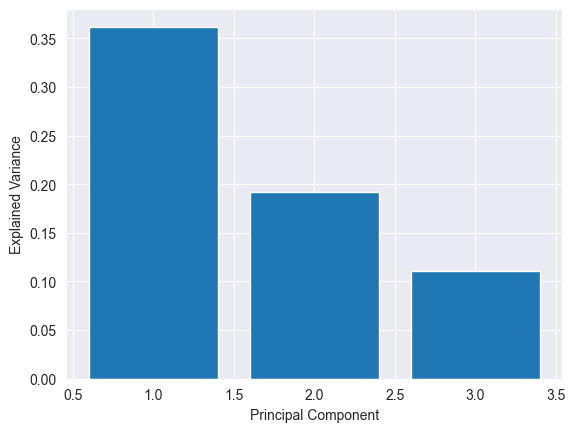

In [14]:
# plot the explained variance
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

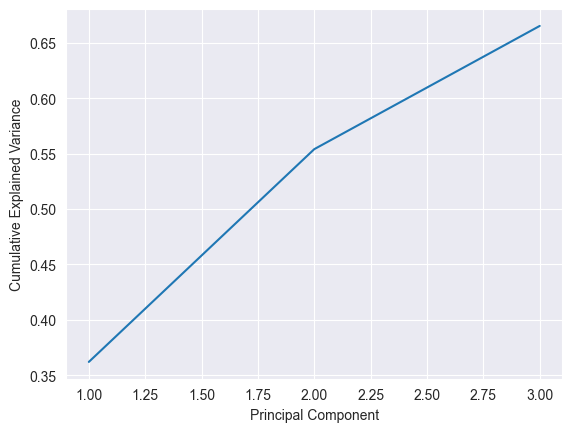

In [15]:
# plot the cumulative explained variance
import numpy as np

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [16]:
sum(pca.explained_variance_ratio_)

0.6652996889318527

## Analyzing the Change in Explained Variance Ratio

In [17]:
import numpy as np
nums = np.arange(14)
 

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

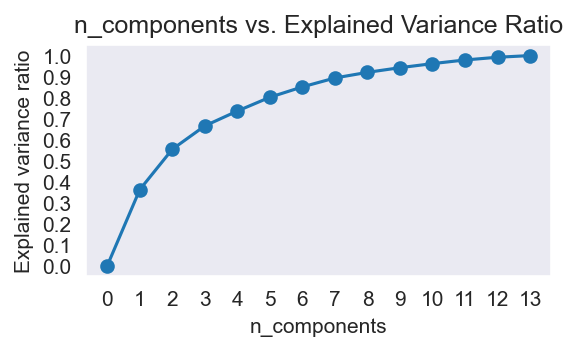

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.xticks(nums)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

## Get the original data back

In [19]:
full_pca = PCA(n_components=13)
df_pca = full_pca.fit_transform(df_scaled)
df_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [20]:
data = full_pca.inverse_transform(df_pca)
data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
df_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [22]:
# original_data = 

df_pca @ full_pca.components_ + full_pca.mean_

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Plot the pca 2D

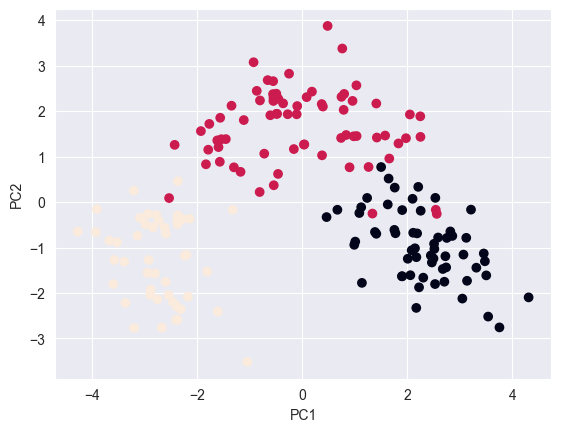

In [23]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Plot the pca 3D

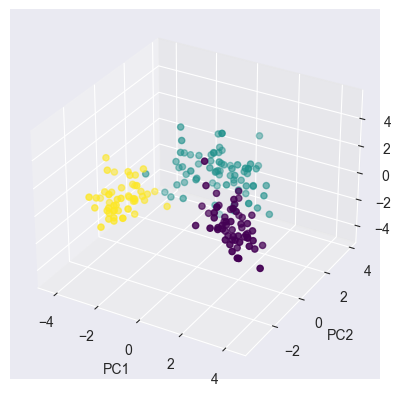

In [24]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], c=target, cmap=cm.viridis)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## MDS

In [25]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
df_mds = mds.fit_transform(df_scaled)
df_mds

array([[ 1.64504359,  3.83721381],
       [ 2.86909753,  1.36295441],
       [ 1.75018958,  2.67022464],
       [ 1.82323426,  4.74637298],
       [-0.59145752,  1.82995104],
       [ 1.21336996,  3.91630669],
       [ 1.6174736 ,  2.72314664],
       [-0.07594272,  3.10663361],
       [ 2.57694951,  2.41359608],
       [ 2.30088994,  2.26047182],
       [ 2.36315411,  3.53933624],
       [ 1.10674168,  1.77978556],
       [ 1.52858488,  1.95451677],
       [ 3.53402588,  3.7831966 ],
       [ 2.88608682,  4.80427241],
       [ 0.3238819 ,  3.29126453],
       [-0.07322315,  3.48303075],
       [-0.05274014,  2.81297955],
       [ 1.4782442 ,  4.8183706 ],
       [ 0.39627382,  2.61405791],
       [ 2.53203599,  2.9554251 ],
       [ 0.21119126,  1.08677102],
       [ 2.21406152,  1.58341878],
       [ 1.53804554,  0.72454037],
       [ 1.68246113,  0.88955523],
       [-1.94540465,  3.68080229],
       [ 0.91000042,  1.7451773 ],
       [ 0.98828224,  0.82142892],
       [ 0.58102447,

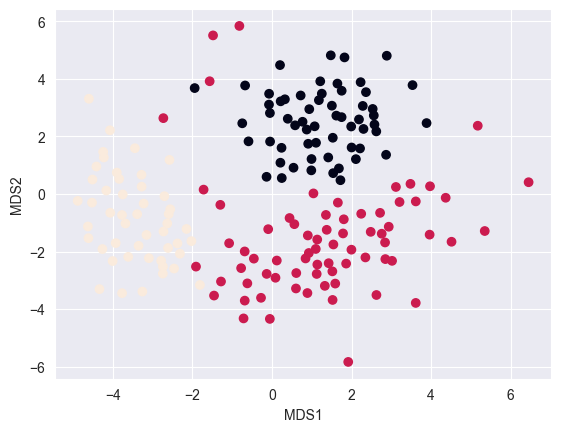

In [26]:
plt.scatter(df_mds[:,0], df_mds[:,1], c=target)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()

## t-SNE

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne

array([[  4.600956  ,  13.982207  ],
       [ -0.80163515,   9.492823  ],
       [  2.4655576 ,  11.387247  ],
       [  1.5297356 ,  15.126794  ],
       [  5.099583  ,   8.117436  ],
       [  1.2127246 ,  14.063862  ],
       [  0.5368623 ,  11.228196  ],
       [  5.231145  ,  10.947369  ],
       [ -0.07179833,  11.920113  ],
       [  2.3579867 ,  13.22389   ],
       [  0.987437  ,  12.693742  ],
       [  0.4166987 ,  10.092936  ],
       [  0.9842322 ,  10.623475  ],
       [ -0.8533267 ,  14.002262  ],
       [ -0.3925902 ,  14.1101675 ],
       [  3.8348362 ,  10.288867  ],
       [  4.2994204 ,  10.923699  ],
       [  4.3951893 ,  10.268874  ],
       [  0.6663172 ,  14.168554  ],
       [  5.562718  ,  12.9860735 ],
       [  4.482659  ,  13.859105  ],
       [  3.6590316 ,   6.552381  ],
       [  1.2116419 ,   9.688274  ],
       [  1.6540192 ,   8.114875  ],
       [  2.2007892 ,   7.770648  ],
       [  5.782265  ,   7.8105173 ],
       [  2.3042812 ,   9.8385    ],
 

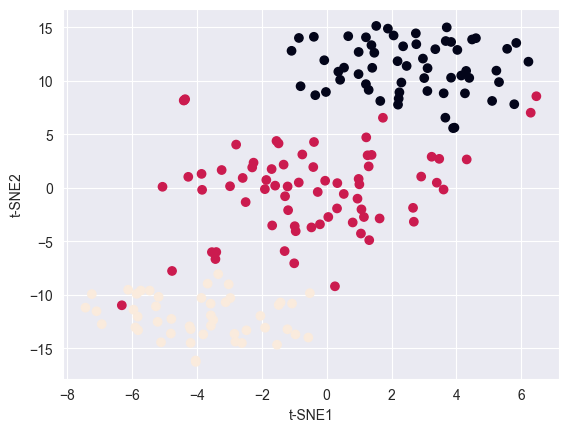

In [28]:
plt.scatter(df_tsne[:,0], df_tsne[:,1], c=target)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [29]:
## UMAP
import umap

umap_model = umap.UMAP(n_components=2)
df_umap = umap_model.fit_transform(df_scaled)
df_umap

array([[ 1.19008284e+01, -6.24452889e-01],
       [ 1.07002239e+01, -5.30596972e-01],
       [ 1.09493275e+01, -1.71558917e+00],
       [ 1.16440277e+01, -1.87328482e+00],
       [ 9.77174473e+00, -1.67705202e+00],
       [ 1.17722778e+01, -2.06888795e+00],
       [ 1.10684977e+01, -1.06471395e+00],
       [ 1.03338928e+01, -1.89400160e+00],
       [ 1.12198648e+01, -9.58830595e-01],
       [ 1.15394287e+01, -1.09072542e+00],
       [ 1.14767570e+01, -1.99261856e+00],
       [ 1.06791315e+01, -9.70094860e-01],
       [ 1.08486643e+01, -1.17567492e+00],
       [ 1.17966223e+01, -1.91303635e+00],
       [ 1.16526728e+01, -2.20216537e+00],
       [ 1.03509216e+01, -2.29447460e+00],
       [ 1.05724564e+01, -2.23318386e+00],
       [ 1.03683777e+01, -2.19935799e+00],
       [ 1.15203409e+01, -2.24832535e+00],
       [ 1.12687407e+01, -2.49949008e-01],
       [ 1.19932756e+01, -6.48543179e-01],
       [ 1.03445559e+01, -7.20092431e-02],
       [ 1.07636299e+01, -8.20625424e-01],
       [ 1.

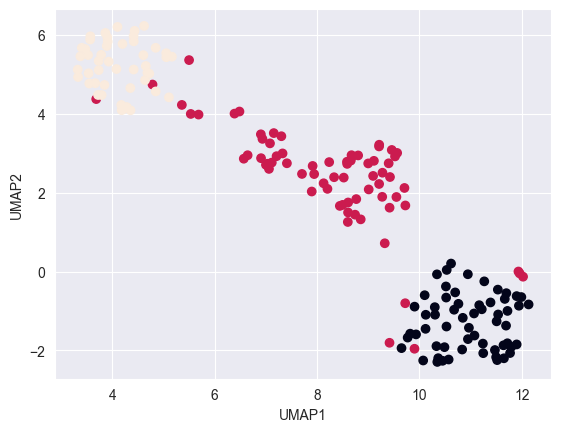

In [30]:
plt.scatter(df_umap[:,0], df_umap[:,1], c=target)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()